# Solving Eigenvalues of One-Dimensional (1D) Schrödinger Equation
**NAME: NURYUSRINA HANANI BINTI YUSRAN**

**NO.MATRIC: 22003097/1**

**SUBJECT: COMPUTER ASSIGNMENT SIF3012 COMPUTATIONAL PHYSICS**

**Introduction**

The Schrödinger equation is a fundamental equation in quantum mechanics that describes how the quantum state of a physical system changes over time. In this assignment, we focus on the time-independent Schrödinger equation (TISE), which is used to determine the allowed energy levels (eigenvalues) and corresponding wavefunctions (eigenfunctions) for a particle in a potential. We will employ the Numerov method, a numerical technique suitable for solving second-order ordinary differential equations, to find the eigenvalues of a particle in a specified potential.

**Step 1: Importing Necessary Libraries**

We begin by importing the libraries required for numerical calculations and plotting. The libraries used include:

In [360]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

- Numpy is used for numerical operations, particularly with arrays and mathematical functions.
- Matplotlib is for creating visualizations of the potential and wavefunctions.
- SciPy provides optimization tools, specifically for root-finding.

**Step 2: Defining Constants and Parameters**

We define the constants and parameters needed for our calculation, including the mass of the particle, the Planck's constant, and the potential parameters:

In [361]:
# Constants and Parameters
hbar = 1.0  # Planck's constant
m = 1.0     # Particle mass
alpha = 1.0 # alpha parameter
lmbda = 4.0 # lambda parameter

Here, we define physical constants and parameters:

- $ℏ$: Reduced Planck's constant, which is fundamental in quantum mechanics.

- $𝑚$: Mass of the particle, which affects the kinetic energy term.

- $𝛼$ and $𝜆$: Parameters defining the shape of the potential function.

**Step 3: Setting Parameters for x-value Range**

We also set the range for our x-values and the step size for numerical calculations:

In [362]:
# x-value range parameters
x_min, x_max = -10, 10  # Original x range
h = 0.05                 # Step size
x = np.arange(x_min, x_max + h, h)  # x values

In this step, we specify the range of $𝑥$ values over which we will solve the Schrödinger equation. The step size $ℎ$ determines the resolution of our numerical solution.

**Step 4: Defining the Potential Function $𝑉(𝑥)$**

In [363]:
# Defining the Potential Function V(x)
def calculate_potential(x):
    """Calculate the potential V(x)"""
    coeff = (hbar**2 / (2 * m)) * alpha**2 * lmbda * (lmbda - 1)
    return coeff * (0.5 - 1 / (np.cosh(alpha * x)**2))

The potential function $𝑉(𝑥)$ is defined using a hyperbolic cosine function. This potential can model various quantum systems. The coefficient scales the potential based on the chosen parameters.

**Step 5: Plotting the Potential Function $𝑉(𝑥)$**

In [364]:
# Plotting the potential function V(x)
def plot_potential_no_lines():
    """Plot potential function as a smooth curve without reference lines"""
    potential = calculate_potential(x)
    plt.figure(figsize=(16, 10))
    plt.plot(x, potential, color="red", linewidth=2, label='Potential V(x)')
    plt.xlabel("x")
    plt.ylabel("Potential Energy V(x)")
    plt.title("Quantum Potential Function")
    plt.grid()
    plt.legend()
    plt.show()

def plot_potential_with_lines(eigenvalues):
    """Plot the potential function V(x) with reference lines for eigenvalues"""
    potential = calculate_potential(x)
    plt.figure(figsize=(16, 10))
    plt.plot(x, potential, color="blue", linewidth=2, label='Potential V(x)')
    
    # Define colors for eigenvalue lines
    line_colors = ['red', 'green', 'purple']
    
    for i, E in enumerate(eigenvalues):
        color = line_colors[i % len(line_colors)]  # Cycle through colors if more than 3 eigenvalues
        plt.axhline(E, color=color, linestyle='--', label=f'Eigenvalue E_{i} = {E:.3f}')
    
    plt.xlim(x_min, x_max)
    plt.xlabel("x")
    plt.ylabel("Potential Energy V(x)")
    plt.title("Quantum Potential Function with Energy Levels")
    plt.grid()
    plt.legend()
    plt.show()

This function visualizes the potential $𝑉(𝑥)$ , providing a graphical representation that is crucial for understanding the behavior of the wavefunctions and energy levels.

**Step 6: Numerov Method Implementation**

**Derivation of the Numerov Method**

To solve the time-independent Schrödinger equation:

$$-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \psi(x) + V(x) \psi(x) = E \psi(x)$$

Where:

- $𝜓(𝑥)$: Wavefunction of the particle.

- $𝑉(𝑥)$: Potential energy function.

- $𝐸$: Total energy of the particle.

- $𝑚$: Mass of the particle.

- $ℏ$: Reduced Planck constant.

we rearrange it into a standard form:

$$ \frac{d^2}{dx^2} \psi(x) = \frac{2m}{\hbar^2}(V(x)-E)\psi(x)$$

We define $𝑘(𝑥)$:

$$ k^2(x) = \frac{2m}{\hbar^2}(V(x)-E) $$

The Numerov method is a finite-difference technique that utilizes a three-point stencil to approximate the second derivative. The update formula is:

$$ \psi_{i + 1} = \frac{2 \psi_{i}\left(1 - \frac{5 h^2 k_i}{12}\right) - \psi_{i - 1}\left(1 + \frac{h^2 k_{i-1}}{12}\right) }{1 + \frac{h^2 k_{i+1}}{12}} $$

where $𝑘_𝑖=𝑘(𝑥_𝑖)$.



In [365]:
# Numerov Method Implementation
def numerov_method(psi0, psi1, energy, x_values, step_size):
    """Integrate wavefunction using the Numerov method"""
    num_points = len(x_values)
    psi = np.zeros(num_points)
    psi[0], psi[1] = psi0, psi1

    potential_function = lambda xi: (2 * m / hbar**2) * (energy - calculate_potential(xi))

    for i in range(1, num_points - 1):
        k0 = potential_function(x_values[i - 1])
        k1 = potential_function(x_values[i])
        k2 = potential_function(x_values[i + 1])
        psi[i + 1] = (2 * (1 - (5 * step_size**2 * k1) / 12) * psi[i] -
                       (1 + (step_size**2 * k0) / 12) * psi[i - 1]) / (1 + (step_size**2 * k2) / 12)

    return psi

This function implements the Numerov method, calculating the wavefunction $𝜓(𝑥)$ iteratively. We initialize the wavefunction values at the first two points and use the update rule to compute subsequent values.

**Step 7: Matching Condition for Finding Eigenvalues**

To find the eigenvalues, we implement a matching condition that checks the continuity of the wavefunction and its derivatives at the turning point. This is crucial for ensuring that the wavefunctions are physically meaningful.

**Derivation of the Matching Condition**

At the turning point where $𝐸 = 𝑉(𝑥)$, the wavefunction and its derivative must match from both sides. We calculate the ratio of the derivatives of the wavefunctions obtained from both sides of the turning point.

The matching condition can be defined as:

$$\text{Matching Condition} = {\frac{\psi'(x)}{\psi(x)}}|_{left} - \frac{\psi'(x)}{\psi(x)}|_{right}$$

In [366]:
# Matching Condition for finding eigenvalues
def matching_condition(energy, x_values, step_size):
    """Calculate the matching condition for eigenvalue finding"""
    mid_index = len(x_values) // 2
    psi_left = numerov_method(0.0, 1e-5, energy, x_values, step_size)
    psi_right = numerov_method(0.0, 1e-5, energy, x_values[::-1], step_size)[::-1]

    ratio_left = (psi_left[mid_index + 1] - psi_left[mid_index - 1]) / (2 * step_size * psi_left[mid_index])
    ratio_right = (psi_right[mid_index + 1] - psi_right[mid_index - 1]) / (2 * step_size * psi_right[mid_index])

    return ratio_left - ratio_right

This function computes the difference in the ratios of the derivatives of the wavefunctions obtained from both sides of the potential, which will help identify the eigenvalues through root-finding.

**Step 8: Root-Finding for Eigenvalues**

We now implement a method to find the eigenvalues using root-finding techniques. We utilize Brent's method, which is efficient for finding roots in a continuous function.

**Derivation of Root-Finding for Eigenvalues**

We search for eigenvalues by examining a range of energy values and looking for sign changes in the matching condition. A sign change indicates the presence of an eigenvalue between those two energies.

In [367]:
# Root-Finding for Eigenvalues
def find_eigenvalues(x_values, step_size, num_levels=3):
    """Find the first num_levels eigenvalues using root-finding"""
    eigenvalues = []
    E_start, E_end, dE = -2.0, 0.0, 2.0  # Initial energy range

    for _ in range(num_levels):
        energies = np.linspace(E_start, E_end, 100)

        for i in range(len(energies) - 1):
            E1, E2 = energies[i], energies[i + 1]

            if matching_condition(E1, x_values, step_size) * matching_condition(E2, x_values, step_size) < 0:
                result = root_scalar(matching_condition, args=(x_values, step_size), bracket=[E1, E2], method='brentq')
                eigenvalues.append(result.root)
                break

        E_start += dE  # Update energy range for the next level
        E_end += dE

    return eigenvalues

This function iteratively searches for the first $𝑛$ eigenvalues, updating the energy range as needed after each successful root-finding attempt.

**Step 9: Plotting the Potential and Wavefunctions**

After obtaining the eigenvalues, we can visualize the potential along with the corresponding wavefunctions.

**Interpretation of Results**

The eigenvalues indicate the allowed energy levels of the quantum system, while the wavefunctions describe the probability distribution of the particle's position.

In [368]:
# Plotting the Potential and Wavefunctions
def plot_wavefunctions(eigenvalues):
    """Plot the wavefunctions corresponding to the eigenvalues"""
    plt.figure(figsize=(16, 10))
    plt.plot(x, calculate_potential(x), color='orange', label='Potential V(x)')

    wave_colors = ['purple', 'green', 'magenta']  # Different colors for wavefunctions

    for i, E in enumerate(eigenvalues):
        psi = numerov_method(0.0, 1e-5, E, x, h)
        normalized_psi = psi / np.max(np.abs(psi)) + E  # Normalize wavefunction
        plt.plot(x, normalized_psi, label=f'Eigenvalue E_{i} = {E:.3f}', color=wave_colors[i], linewidth=1.5)

    plt.xlabel("x")
    plt.ylabel("Wavefunction / Energy")
    plt.title("Wavefunctions for Quantum Potential")
    plt.xlim(x_min, x_max)
    plt.grid()
    plt.legend()
    plt.show()

This function plots the potential alongside the normalized wavefunctions, allowing us to visualize where the wavefunctions intersect the potential, which corresponds to the probabilities of finding the particle in those regions.

**Step 10: Exact Eigenvalues for Comparison**

For a rigorous evaluation of our numerical results, we can compute the exact eigenvalues based on known analytical solutions for comparison.

**Formula for Exact Eigenvalues**

The exact eigenvalues for a system can often be derived analytically. For instance, in this case:

$$E_n = \frac{\hbar^2}{2m}{\alpha^2}(\lambda(\lambda-1)/2 - (\lambda-1-n)^2)$$

For $n = 0,1,2$

In [369]:
# Exact Eigenvalues for Comparison
def exact_eigenvalues(num_levels):
    """Calculate exact eigenvalues for comparison"""
    return [(hbar**2 / (2 * m)) * alpha**2 * (lmbda * (lmbda - 1) / 2 - (lmbda - 1 - n)**2) for n in range(num_levels)]

This function computes the exact eigenvalues for comparison with our numerical results.

**Step 11: Main Execution**

Finally, we execute the functions defined above to visualize the potential, compute the eigenvalues, and plot the wavefunctions.

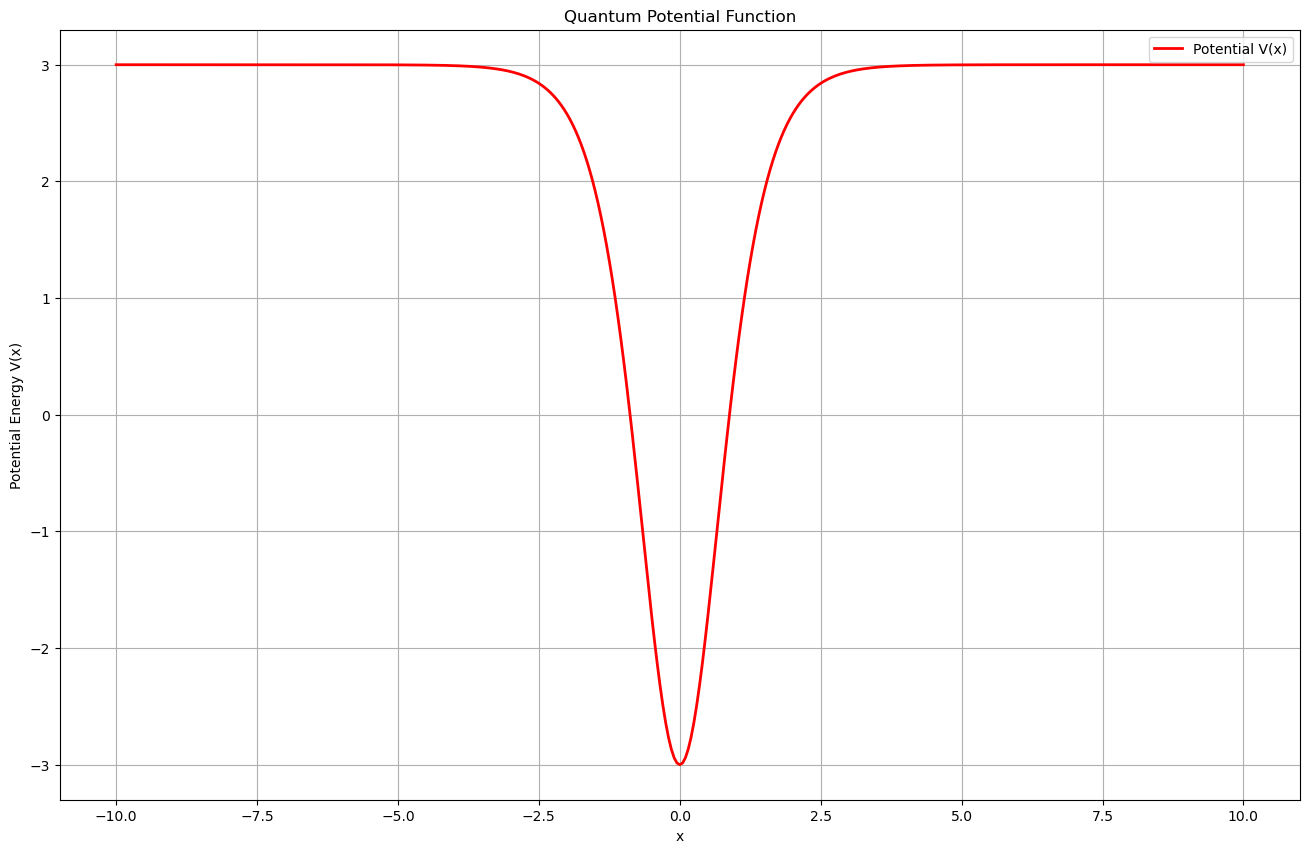

Numerically solved Eigenvalues:
E_0 = -1.500001
E_1 = 0.999998
E_2 = 2.499998


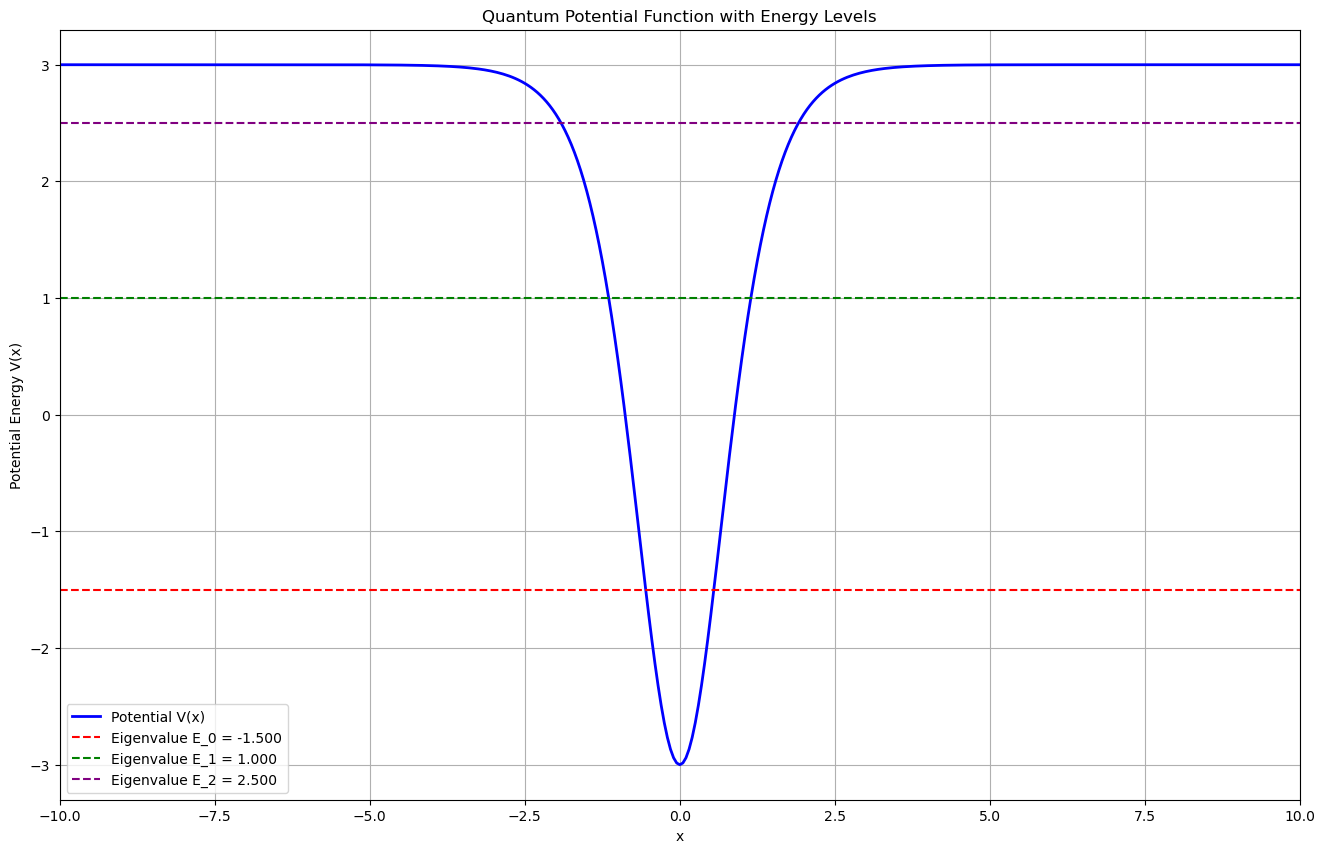

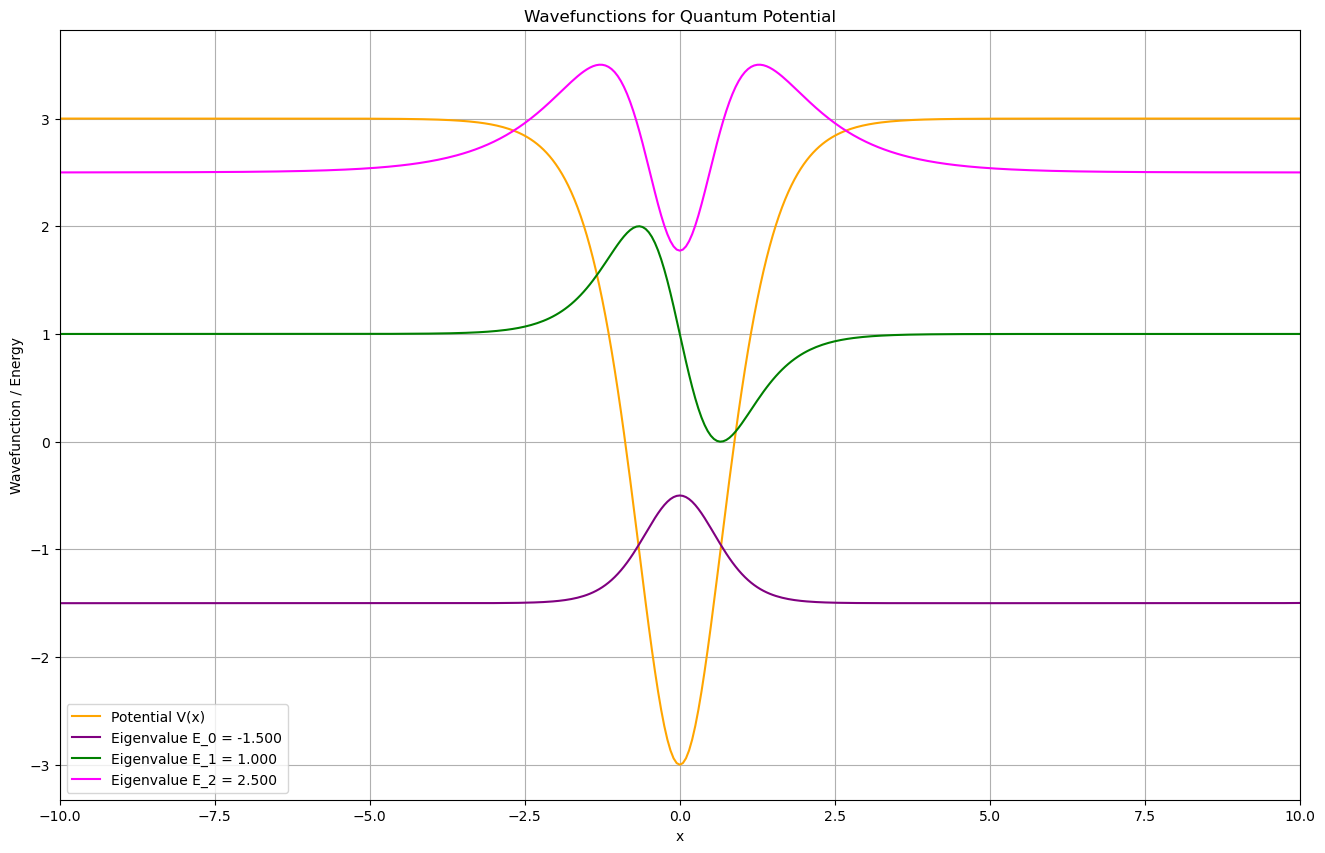

In [370]:
# Main execution
# Plot 1: Potential without reference lines (smooth curve)
plot_potential_no_lines()

# Find eigenvalues
num_levels = 3
eigenvalues = find_eigenvalues(x, h, num_levels=num_levels)

# Print eigenvalues numerically
print("Numerically solved Eigenvalues:")
for i, E in enumerate(eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Plot 2: Potential with reference lines for eigenvalues
plot_potential_with_lines(eigenvalues)

# Plot 3: Wavefunctions with eigenvalues
plot_wavefunctions(eigenvalues)

**Conclusion**

This assignment illustrates the numerical solution of the one-dimensional Schrödinger equation using the Numerov method. By carefully implementing the code and analyzing the results, we gain insights into the behavior of quantum systems. The comparison with exact eigenvalues highlights the effectiveness of the Numerov method and reinforces the importance of numerical techniques in solving complex quantum mechanical problems.